In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from nistats.design_matrix import _make_drift

# Drifts generated in nistats
 Nistatis is a package for modeling and statistical inference on fMRI data in Python.
 
 Let's check cosine drifts first:

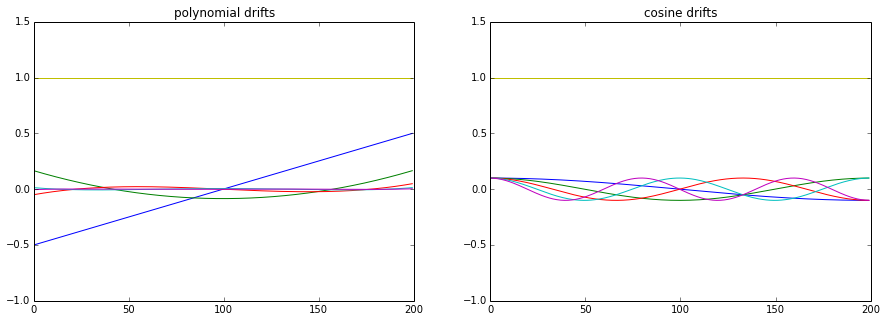

In [3]:
drifts1 = _make_drift('cosine', frame_times=np.arange(200), period_cut=64)
drifts2 = _make_drift('polynomial', frame_times=np.arange(200), order=5)
f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(drifts2[0])
ax[0].axis([0,200,-1,1.5])
ax[0].set_title('polynomial drifts')
ax[1].plot(drifts1[0])
ax[1].axis([0,200,-1,1.5])
ax[1].set_title('cosine drifts')

# Drifts that we generate in pyhrf
They are polynomial

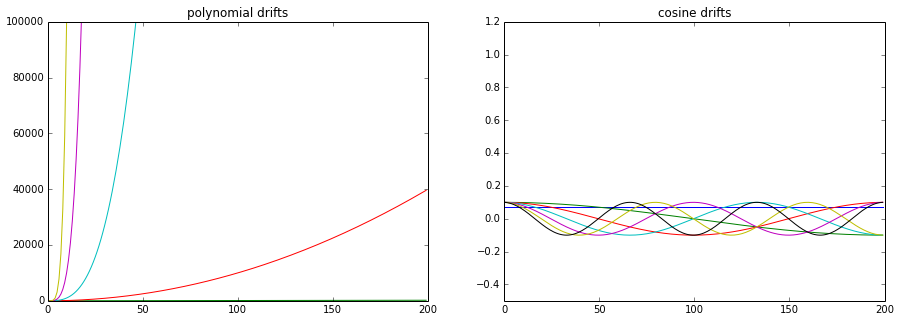

In [22]:
from pyhrf.vbjde.vem_tools import PolyMat

def CosMat(Nscans, paramLFD, tr):
    n = np.arange(0, Nscans)
    fctNb = np.fix(2 * (Nscans * tr) / paramLFD + 1.)  # +1 stands for the mean/cst regressor
    lfdMat = np.zeros((Nscans, fctNb), dtype=float)
    lfdMat[:, 0] = np.ones(Nscans, dtype=float) / np.sqrt(Nscans)
    samples = 1. + np.arange(fctNb - 1)
    for k in range(1, fctNb):
        lfdMat[:, k] = np.sqrt(2.0 / Nscans) * np.cos(np.pi * (2. * n + 1.) * k / (2 * Nscans))
    return lfdMat

drifts3 = PolyMat(200, 5, 1)
drifts4 = CosMat(200, 64, 1)
f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(drifts3)
ax[0].axis([0,200,-0.5,100000.])
ax[0].set_title('polynomial drifts')
ax[1].plot(drifts4)
ax[1].axis([0,200,-0.5,1.2])
ax[1].set_title('cosine drifts')

## What if we orthogonalize them? 

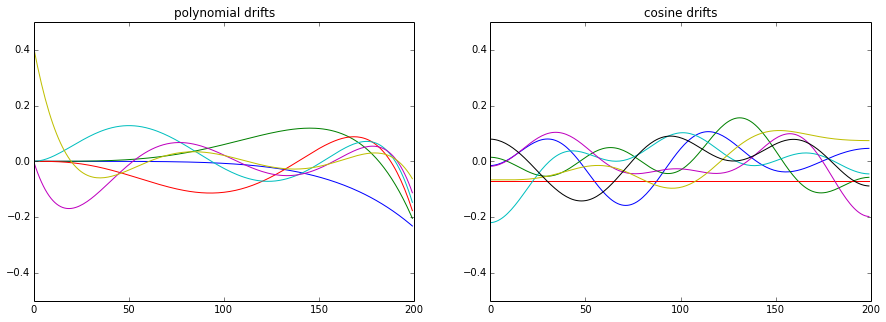

In [23]:
import scipy as sp
drifts3b = np.array(sp.linalg.orth(drifts3))
drifts4b = np.array(sp.linalg.orth(drifts4))
f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(drifts3b)
ax[0].axis([0,200,-0.5,0.5])
ax[0].set_title('polynomial drifts')
ax[1].plot(drifts4b)
ax[1].axis([0,200,-0.5,0.5])
ax[1].set_title('cosine drifts')

In [23]:
#from pyhrf.tools.misc import buildPolyMat
#drifts5 = buildPolyMat(5, 200, 1)
#from pyhrf.jde.models import BOLDSamplerInput
#bold_sampler = BOLDSamplerInput(data, 0.5, 'cosine', 5, False, 25.)
#print 'Are the drifts from MCMC version and VEM version equivalent? ', np.abs(drifts5 - drifts3).sum()==0

In [24]:
print drifts1[0].shape
print drifts2[0].shape
print drifts3.shape

(200, 6)
(200, 6)
(200, 6)


# Are they orthogonal?
Orthogonal means:  $\langle x, y \rangle = 0$, so here $$P^T P = w Id$$ being $w$ a vector of weights.

In [35]:
print 'nistats cosine drifts: '
np.round(drifts1[0].T.dot(drifts1[0]), 3)

nistats cosine drifts: 


array([[   1.,   -0.,    0.,   -0.,    0.,   -0.],
       [  -0.,    1.,   -0.,    0.,   -0.,    0.],
       [   0.,   -0.,    1.,   -0.,    0.,   -0.],
       [  -0.,    0.,   -0.,    1.,    0.,    0.],
       [   0.,   -0.,    0.,    0.,    1.,   -0.],
       [  -0.,    0.,   -0.,    0.,   -0.,  200.]])

In [26]:
print 'nistats polynomial drifts: '
np.round(drifts2[0].T.dot(drifts2[0]), 3)

array([[  1.68340000e+01,   0.00000000e+00,   0.00000000e+00,
         -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00],
       [  0.00000000e+00,   1.13300000e+00,  -0.00000000e+00,
         -0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,  -0.00000000e+00,   7.40000000e-02,
          0.00000000e+00,   0.00000000e+00,  -0.00000000e+00],
       [ -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
          5.00000000e-03,   0.00000000e+00,  -0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,  -0.00000000e+00],
       [ -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -0.00000000e+00,   2.00000000e+02]])

In [33]:
print 'pyhrf polynomial drifts: '
print np.round(drifts3.T.dot(drifts3), 3)
print 'pyhrf polynomial drifts orthogonalized: '
print np.round(drifts3b.T.dot(drifts3b), 3)

pyhrf polynomial drifts: 
[[  2.00000000e+02   1.99000000e+04   2.64670000e+06   3.96010000e+08
    6.32026667e+10   1.05073333e+13]
 [  1.99000000e+04   2.64670000e+06   3.96010000e+08   6.32026667e+10
    1.05073333e+13   1.79673143e+15]
 [  2.64670000e+06   3.96010000e+08   6.32026667e+10   1.05073333e+13
    1.79673143e+15   3.13637333e+17]
 [  3.96010000e+08   6.32026667e+10   1.05073333e+13   1.79673143e+15
    3.13637333e+17   5.56174221e+19]
 [  6.32026667e+10   1.05073333e+13   1.79673143e+15   3.13637333e+17
    5.56174221e+19   9.98591996e+21]
 [  1.05073333e+13   1.79673143e+15   3.13637333e+17   5.56174221e+19
    9.98591996e+21   1.81104484e+24]]
pyhrf polynomial drifts orthogonalized: 
[[ 1. -0. -0.  0. -0.  0.]
 [-0.  1. -0.  0. -0.  0.]
 [-0. -0.  1.  0. -0.  0.]
 [ 0.  0.  0.  1.  0. -0.]
 [-0. -0. -0.  0.  1.  0.]
 [ 0.  0.  0. -0.  0.  1.]]


In [34]:
print 'pyhrf cosine drifts: '
print np.round(drifts4.T.dot(drifts4), 3)
print 'pyhrf cosine drifts orthogonalized: '
print np.round(drifts4b.T.dot(drifts4b), 3)

pyhrf cosine drifts: 
[[ 1.  0. -0.  0. -0.  0. -0.]
 [ 0.  1.  0. -0.  0. -0.  0.]
 [-0.  0.  1.  0. -0.  0. -0.]
 [ 0. -0.  0.  1.  0. -0.  0.]
 [-0.  0. -0.  0.  1.  0. -0.]
 [ 0. -0.  0. -0.  0.  1.  0.]
 [-0.  0. -0.  0. -0.  0.  1.]]
pyhrf cosine drifts orthogonalized: 
[[ 1. -0. -0. -0.  0. -0. -0.]
 [-0.  1. -0. -0. -0. -0. -0.]
 [-0. -0.  1. -0.  0. -0.  0.]
 [-0. -0. -0.  1. -0.  0.  0.]
 [ 0. -0.  0. -0.  1. -0.  0.]
 [-0. -0. -0.  0. -0.  1. -0.]
 [-0. -0.  0.  0.  0. -0.  1.]]


# Are they orthonormal?
In linear algebra, two vectors in an inner product space are orthonormal if they are orthogonal and unit vectors. We already checked if they were orthogonal. Now are they unit vectors?

In [36]:
print 'nistats cosine drifts vector norms: ', np.linalg.norm(drifts1[0], axis=0)
print 'nistats polynomial drifts vector norms: ', np.linalg.norm(drifts2[0], axis=0)
print 'pyhrf polynomial drifts vector norms: ', np.linalg.norm(drifts3, axis=0)
print 'pyhrf polynomial drifts vector norms, after orthogonalization: ', np.linalg.norm(drifts3b, axis=0)
print 'pyhrf cosine drifts vector norms: ', np.linalg.norm(drifts4, axis=0)
print 'pyhrf cosine drifts vector norms, after orthogonalization: ', np.linalg.norm(drifts4b, axis=0)

nistats cosine drifts vector norms:  [  1.           1.           1.           1.           1.          14.14213562]
nistats polynomial drifts vector norms:  [  4.10294661   1.06464652   0.27126311   0.06868161   0.0173382
  14.14213562]
pyhrf polynomial drifts vector norms:  [  1.41421356e+01   1.62686816e+03   2.51401405e+05   4.23878689e+07
   7.45770890e+09   1.34575066e+12]
pyhrf polynomial drifts vector norms, after orthogonalization:  [ 1.  1.  1.  1.  1.  1.]
pyhrf cosine drifts vector norms:  [ 1.  1.  1.  1.  1.  1.  1.]
pyhrf cosine drifts vector norms, after orthogonalization:  [ 1.  1.  1.  1.  1.  1.  1.]


### Pyhrf drifts are orthogonal and othonormal. nistats drifts are orthogonal but not orthonormal. 

###Cosine drifts in pyhrf are already orthogonal and orthonormal

###Polynomial drifts in pyhrf need orthogonalization and we do not have a constant drift anymore. The constant will be weighted across the regressors
